# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from wordcloud import WordCloud

In [3]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [5]:
import PyPDF2

In [6]:
import os

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
import pickle

In [12]:
from sklearn.preprocessing import label_binarize

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report

In [14]:
from sklearn.model_selection import GridSearchCV

# Data Import

In [15]:
data_dir = ".\Resume_Dataset\data\data"
resumes = []
labels = []

In [16]:
def extract_pdf_content(filepath):
    with open(filepath, 'rb') as file:
        reader = PyPDF2.PdfReader(file)  # Change this line
        text = " ".join([page.extract_text() for page in reader.pages])  # And this line
    return text

In [17]:
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith(".pdf"):
                filepath = os.path.join(folder_path, filename)
                content = extract_pdf_content(filepath)
                resumes.append(content)
                labels.append(folder)


In [18]:
labels

['ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTANT',
 'ACCOUNTA

In [19]:
len(labels)

2484

In [20]:
resumes

['ACCOUNTANT\nSummary\nFinancial Accountant specializing in financial planning, reporting and analysis within the Department of Defense.\nHighlights\nAccount reconciliations\nResults-oriented\nFinancial reporting\nCritical thinking\nAccounting operations professional\nAnalysis of financial systems\nERP (Enterprise Resource Planning) software.\nExcellent facilitator\nAccomplishments\nServed on a tiger team which identified and resolved General Ledger postings in DEAMS totaling $360B in accounting adjustments. This allowed\nfor the first successful fiscal year-end close for 2012.\nIn collaboration with DFAS Europe, developed an automated tool that identified duplicate obligations. This tool allowed HQ USAFE to\ndeobligate over $5M in duplicate obligations.\nExperience\nCompany Name\n \nJuly 2011\n \nto \nNovember 2012\n \nAccountant\n \nCity\n \n, \nState\nEnterprise Resource Planning Office (ERO)\nIn this position as an Accountant assigned to the Defense Enterprise Accounting and Manage

In [21]:
len(resumes)

2484

Creating  a common data frame for above so that it is easier to work on

In [22]:
df = pd.DataFrame({'Resume': resumes,'Category': labels})

In [23]:
df.head()

Resume    Category
0  ACCOUNTANT\nSummary\nFinancial Accountant spec...  ACCOUNTANT
1  STAFF ACCOUNTANT\nSummary\nHighly analytical a...  ACCOUNTANT
2  ACCOUNTANT\nProfessional Summary\nTo obtain a ...  ACCOUNTANT
3  SENIOR ACCOUNTANT\nExperience\nCompany Name\n ...  ACCOUNTANT
4  SENIOR ACCOUNTANT\nProfessional Summary\nSenio...  ACCOUNTANT

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resume    2484 non-null   object
 1   Category  2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [25]:
df.describe()

Resume  \
count                                                2484   
unique                                               2482   
top     STOREKEEPER II\nProfessional Summary\nThe purp...   
freq                                                    2   

                      Category  
count                     2484  
unique                      24  
top     INFORMATION-TECHNOLOGY  
freq                       120

In [26]:
df.isna().sum()

Resume      0
Category    0
dtype: int64

In [27]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ACCOUNTANT                118
ADVOCATE                  118
FINANCE                   118
ENGINEERING               118
CHEF                      118
FITNESS                   117
AVIATION                  117
SALES                     116
HEALTHCARE                115
CONSULTANT                115
BANKING                   115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_1212\3332997326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Category" , palette="Set3", data=df, order = df['Category'].value_counts().index)


<Axes: xlabel='count', ylabel='Category'>

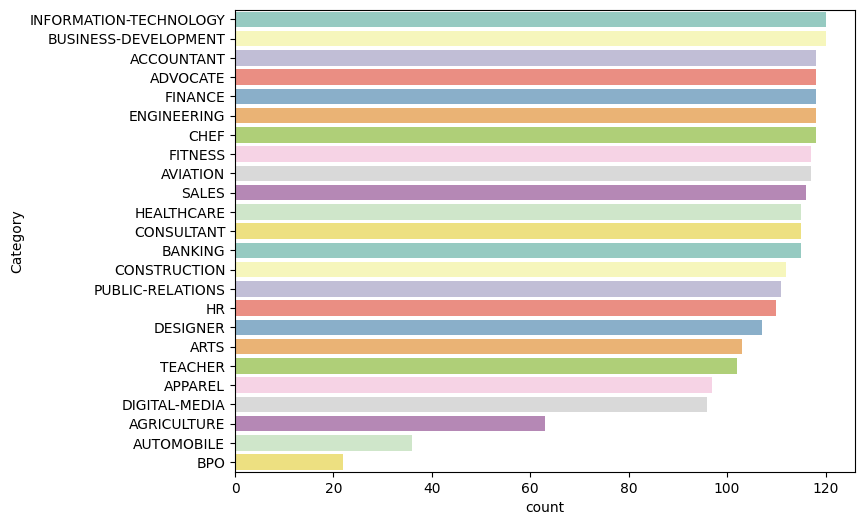

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(y="Category" , palette="Set3", data=df, order = df['Category'].value_counts().index)

# Segmentation

We will make seperate columns for heading, Highlights, Experience, Education and skills that are extracted from the Resume column and finally dropping the Resume column

In [29]:
def extract_section(text, heading_name):
    # Define pattern for the section
    pattern = r'(?i)(' + re.escape(heading_name) + r'\n)([\s\S]*?)(?=\n[A-Z]+\n|$)'
    
    match = re.search(pattern, text)
    return match.group(2).strip() if match else None

In [30]:
experience_contents = [extract_section(resume, 'Experience') for resume in resumes]
education_contents = [extract_section(resume, 'Education') for resume in resumes]
skills_contents = [extract_section(resume, 'Skills') for resume in resumes]

In [31]:
len(skills_contents)

2484

In [32]:
df['Experience'] = experience_contents
df['Education'] = education_contents
df['Skills'] = skills_contents

In [33]:
df.drop('Resume', axis=1)

Category                                         Experience  \
0     ACCOUNTANT  Company Name\n \nJuly 2011\n \nto \nNovember 2012   
1     ACCOUNTANT  Staff Accountant\n \nJanuary 2014\n \nto \nOct...   
2     ACCOUNTANT  Accountant\n \nJanuary 2011\n \nto \nNovember ...   
3     ACCOUNTANT                  Company Name\n \nJune 2011\n \nto   
4     ACCOUNTANT                                               None   
...          ...                                                ...   
2479     TEACHER  Company Name\n \nAugust 2006\n \nto \nMay 2017...   
2480     TEACHER                                               None   
2481     TEACHER                  Company Name\n \nJune 2012\n \nto   
2482     TEACHER                           08/2013\n \nto \n01/2016   
2483     TEACHER                                  Assistant Teacher   

                                              Education  \
0             Northern Maine Community College\n \n1994   
1                             Bachelor of Science\n \n:   
2     Computer Applications Specialist Certificate P...   
3     EMORY UNIVERSITY, Goizueta Business School\n \...   
4             Bachelor of Business Administration\n \n:   
...                                                 ...   
2479  University of South Florida\n \n2002\n \nBache...   
2480  Bachelor of Science\n \n: \nInterdisciplinary ...   
2481  University of Phoenix,\n \n2007\n \nMaster of ...   
2482  Conflict resolution techniques\nTraining in fo...   
2483                                               None   

                                                 Skills  
0     Accounting; General Accounting; Accounts Payab...  
1     accounting, accounts payable, Accounts Receiva...  
2     accounts payables, accounts receivables, Accou...  
3     accounting, balance sheet, budgets, client, cl...  
4                                           Aderant/CMS  
...                                                 ...  
2479                          Highly Effective TeacherÂ  
2480  [Number]\n \nWPM typing speed\nProfessional ph...  
2481  conflict resolution, course development, criti...  
2482  CPR, Creative thinking, delivery, First Aid, p...  
2483  Superb communication both verbal and written.\...  

[2484 rows x 4 columns]

In [34]:
df.head()

Resume    Category  \
0  ACCOUNTANT\nSummary\nFinancial Accountant spec...  ACCOUNTANT   
1  STAFF ACCOUNTANT\nSummary\nHighly analytical a...  ACCOUNTANT   
2  ACCOUNTANT\nProfessional Summary\nTo obtain a ...  ACCOUNTANT   
3  SENIOR ACCOUNTANT\nExperience\nCompany Name\n ...  ACCOUNTANT   
4  SENIOR ACCOUNTANT\nProfessional Summary\nSenio...  ACCOUNTANT   

                                          Experience  \
0  Company Name\n \nJuly 2011\n \nto \nNovember 2012   
1  Staff Accountant\n \nJanuary 2014\n \nto \nOct...   
2  Accountant\n \nJanuary 2011\n \nto \nNovember ...   
3                  Company Name\n \nJune 2011\n \nto   
4                                               None   

                                           Education  \
0          Northern Maine Community College\n \n1994   
1                          Bachelor of Science\n \n:   
2  Computer Applications Specialist Certificate P...   
3  EMORY UNIVERSITY, Goizueta Business School\n \...   
4          Bachelor of Business Administration\n \n:   

                                              Skills  
0  Accounting; General Accounting; Accounts Payab...  
1  accounting, accounts payable, Accounts Receiva...  
2  accounts payables, accounts receivables, Accou...  
3  accounting, balance sheet, budgets, client, cl...  
4                                        Aderant/CMS

In [35]:
columns_to_replace = ['Resume', 'Experience', 'Education', 'Skills']

for column in columns_to_replace:
    df[column] = df[column].str.replace('\n', ' ')

In [36]:
df.head()

Resume    Category  \
0  ACCOUNTANT Summary Financial Accountant specia...  ACCOUNTANT   
1  STAFF ACCOUNTANT Summary Highly analytical and...  ACCOUNTANT   
2  ACCOUNTANT Professional Summary To obtain a po...  ACCOUNTANT   
3  SENIOR ACCOUNTANT Experience Company Name   Ju...  ACCOUNTANT   
4  SENIOR ACCOUNTANT Professional Summary Senior ...  ACCOUNTANT   

                                          Experience  \
0       Company Name   July 2011   to  November 2012   
1  Staff Accountant   January 2014   to  October ...   
2  Accountant   January 2011   to  November 2015 ...   
3                      Company Name   June 2011   to   
4                                               None   

                                           Education  \
0            Northern Maine Community College   1994   
1                            Bachelor of Science   :   
2  Computer Applications Specialist Certificate P...   
3  EMORY UNIVERSITY, Goizueta Business School   5...   
4            Bachelor of Business Administration   :   

                                              Skills  
0  Accounting; General Accounting; Accounts Payab...  
1  accounting, accounts payable, Accounts Receiva...  
2  accounts payables, accounts receivables, Accou...  
3  accounting, balance sheet, budgets, client, cl...  
4                                        Aderant/CMS

In [37]:
df.describe()

Resume  \
count                                                2484   
unique                                               2482   
top     STOREKEEPER II Professional Summary The purpos...   
freq                                                    2   

                      Category    Experience                Education  Skills  
count                     2484          2268                     1913    2398  
unique                      24          1912                     1751    2374  
top     INFORMATION-TECHNOLOGY  Company Name  Bachelor of Science   :  Skills  
freq                       120           138                       36       6

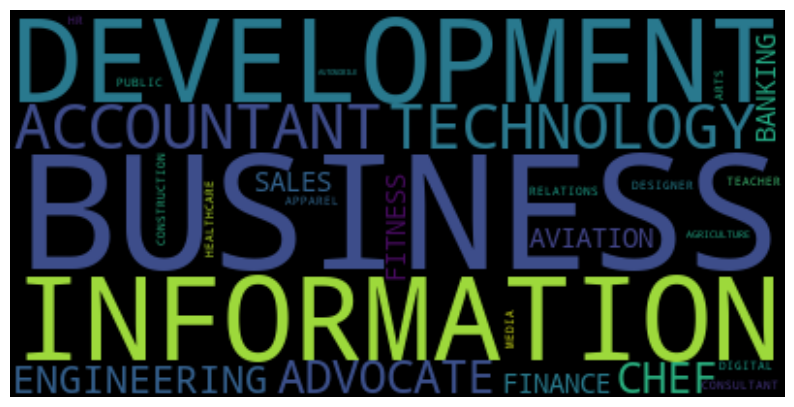

In [38]:
# Assuming your dataframe is named df and the categorical variable is 'category'
text = ' '.join(df['Category'])

# Create and generate a word cloud image:
wordcloud = WordCloud(font_step=2, max_font_size=500, collocations = False, collocation_threshold = 1).generate(text)

# Display the generated image:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Text Cleaning

In [39]:
columns_to_update = ['Experience', 'Education', 'Skills']

Lowercasing

In [40]:
for column in columns_to_update:
    df[column] = df[column].str.lower()

Removing Punctuation marks

In [41]:
for column in columns_to_update:
    df[column] = df[column].str.translate(str.maketrans('', '', string.punctuation))

Tokenization

In [42]:
# Tokenizing 'Experience' column
df['Experience_Tokens'] = df['Experience'].str.split()

# Tokenizing 'Education' column
df['Education_Tokens'] = df['Education'].str.split()

# Tokenizing 'Skills' column
df['Skills_Tokens'] = df['Skills'].str.split()

Stop word removal

In [43]:
# Removing stopwords from 'Experience_Tokens' column
if df['Experience_Tokens'].isna().any():
    pass
else:
    df['Experience_Tokens'] = df['Experience_Tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in ENGLISH_STOP_WORDS])

# Removing stopwords from 'Education_Tokens' column
if df['Education_Tokens'].isna().any():
    pass
else:
    df['Education_Tokens'] = df['Education_Tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in ENGLISH_STOP_WORDS])

# Removing stopwords from 'Skills_Tokens' column
if df['Skills_Tokens'].isna().any():
    pass
else:
    df['Skills_Tokens'] = df['Skills_Tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in ENGLISH_STOP_WORDS])

Stemming

In [44]:
def regex_stemmer(text):
    # Define some basic stemming patterns for English
    patterns = [
        (r'ies$', 'y'),       # 'ponies' -> 'pony'
        (r'ses$', 's'),       # 'processes' -> 'process'
        (r'ing$', ''),        # 'running' -> 'run'
        (r'ed$', ''),         # 'hashed' -> 'hash'
        (r's$', ''),          # 'cats' -> 'cat'
        (r'ly$', '')          # 'quickly' -> 'quick'
    ]

    words = text.split()
    stemmed_words = []
    
    for word in words:
        for pattern, replacement in patterns:
            if re.search(pattern, word):
                word = re.sub(pattern, replacement, word)
                break  # apply only one rule, then move to the next word
        stemmed_words.append(word)
    
    return " ".join(stemmed_words)

if df['Experience_Tokens'].isna().any():
    pass
else:
    df['Experience_Tokens'] = df['Experience_Tokens'].apply(regex_stemmer)

# Removing stopwords from 'Education_Tokens' column
if df['Education_Tokens'].isna().any():
    pass
else:
    df['Education_Tokens'] = df['Education_Tokens'].apply(regex_stemmer)


# Removing stopwords from 'Skills_Tokens' column
if df['Skills_Tokens'].isna().any():
    pass
else:
    df['Skills_Tokens'] = df['Skills_Tokens'].apply(regex_stemmer)

In [45]:
df.head(n=1)

Resume    Category  \
0  ACCOUNTANT Summary Financial Accountant specia...  ACCOUNTANT   

                                     Experience  \
0  company name   july 2011   to  november 2012   

                                 Education  \
0  northern maine community college   1994   

                                              Skills  \
0  accounting general accounting accounts payable...   

                                 Experience_Tokens  \
0  [company, name, july, 2011, to, november, 2012]   

                              Education_Tokens  \
0  [northern, maine, community, college, 1994]   

                                       Skills_Tokens  
0  [accounting, general, accounting, accounts, pa...

In [46]:
df = df.dropna(subset=['Experience', 'Education', 'Skills'])

Converting the ordinal data using encoding

In [47]:
df['encoded'] = df['Category'].astype('category').cat.codes

In [48]:
df["Category"].value_counts()

Category
FINANCE                   93
BANKING                   88
PUBLIC-RELATIONS          81
BUSINESS-DEVELOPMENT      81
CHEF                      81
HR                        80
ACCOUNTANT                77
SALES                     76
INFORMATION-TECHNOLOGY    76
ARTS                      74
CONSTRUCTION              74
AVIATION                  72
FITNESS                   72
DESIGNER                  71
ENGINEERING               69
TEACHER                   68
APPAREL                   67
CONSULTANT                66
DIGITAL-MEDIA             63
ADVOCATE                  63
HEALTHCARE                61
AGRICULTURE               44
AUTOMOBILE                21
BPO                       16
Name: count, dtype: int64

In [49]:
category_mapping = dict(enumerate(df['Category'].astype('category').cat.categories))
df['decoded'] = df['encoded'].map(category_mapping)

# Feature Engineering

In [50]:
df['Combined_Text'] = df['Experience'] + " " + df['Education'] + " " + df['Skills']

In [51]:
non_string_rows = df[df['Combined_Text'].apply(lambda x: not isinstance(x, str))]
print(non_string_rows)

Empty DataFrame
Columns: [Resume, Category, Experience, Education, Skills, Experience_Tokens, Education_Tokens, Skills_Tokens, encoded, decoded, Combined_Text]
Index: []


In [52]:
X = df['Combined_Text']
y = df['encoded']

In [53]:
# Convert the combined tokens into TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85)
X_vec = vectorizer.fit_transform(df['Combined_Text'])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Models

Logistic Regression

In [55]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
with open("logreg_model.pkl", "wb") as f:
    pickle.dump(logreg, f)

Random Forest

In [56]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)

Decision tree

In [57]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
with open("dt_model.pkl", "wb") as f:
    pickle.dump(dt, f)

SVM

In [58]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm, f)

Multinomial Naive Bayes

In [59]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
mnb_accuracy = accuracy_score(y_test, mnb_pred)
with open("mnb_model.pkl", "wb") as f:
    pickle.dump(mnb, f)

K- Nearest Neighbours

In [60]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
with open("knn_model.pkl", "wb") as f:
    pickle.dump(knn, f)

In [61]:
print(f"Logistic Regression Accuracy: {logreg_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")
print(f"Multinomial Naive Bayes Accuracy: {mnb_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")

Logistic Regression Accuracy: 0.5198776758409785
Random Forest Accuracy: 0.5015290519877675
Decision Tree Accuracy: 0.40061162079510704
SVM Accuracy: 0.4801223241590214
Multinomial Naive Bayes Accuracy: 0.43730886850152906
KNN Accuracy: 0.4036697247706422


# Model Evaluation

In [62]:
def print_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {type(model).__name__}:")
    print(cm)
    print("\n")

models = [logreg, rf, dt, svm, mnb, knn]
for model in models:
    print_confusion_matrix(model, X_test, y_test)


Confusion Matrix for LogisticRegression:
[[13  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  3  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  3  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  1  0  0  0  1  1  1  2]
 [ 0  0  0  3  0  0  0  2  0  0  1  1  0  2  1  1  0  1  0  0  0  1  1  1]
 [ 0  0  0  0  4  0  0  0  0  0  1  0  2  0  1  0  2  0  0  0  0  1  2  4]
 [ 0  0  0  0  0  0  0  1  0  1  0  0  1  0  0  0  0  0  1  0  0  0  1  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  2  0  0  0  3  0  0  0  0  4  2  4  0]
 [ 0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  2  0  0  2  2  1  1  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  0]
 [ 0  0  0  0  0  0  1  3  0 10  0  0  1  0  1  0  3  0  0  0  0  1  0  0]
 [ 0  0  0  0  1  0  1  0  0  1 15  0  0  0  0  0  1  0  0  0  0  1  0  1]
 [ 0  0  0  0  0  0  0  1  0  1  0  8  0  1  0  1  1  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  1  2  0  0  0  0  0  1 

In [63]:
models = {
    'Logistic Regression': logreg,
    'Random Forest': rf,
    'Decision Tree': dt,
    'SVM': svm,
    'Multinomial Naive Bayes': mnb,
    'KNN': knn
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    
    print(f'Classification Report for {model_name}:\n')
    print(report)
    print('-'*60)

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        17
           1       0.50      0.27      0.35        11
           2       0.00      0.00      0.00         8
           3       0.75      0.20      0.32        15
           4       0.33      0.24      0.28        17
           5       0.00      0.00      0.00         5
           6       0.50      0.21      0.30        19
           7       0.50      0.58      0.54        19
           8       0.00      0.00      0.00         4
           9       0.45      0.50      0.48        20
          10       0.88      0.71      0.79        21
          11       0.67      0.57      0.62        14
          12       0.25      0.25      0.25         8
          13       0.71      0.75      0.73        16
          14       0.33      0.27      0.30        11
          15       0.44      0.78      0.56         9
          16       0.50      0.82

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarn

Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.83      0.59      0.69        17
           1       1.00      0.27      0.43        11
           2       0.00      0.00      0.00         8
           3       0.50      0.20      0.29        15
           4       0.24      0.35      0.29        17
           5       0.00      0.00      0.00         5
           6       0.44      0.21      0.29        19
           7       0.23      0.63      0.33        19
           8       0.00      0.00      0.00         4
           9       0.36      0.40      0.38        20
          10       1.00      0.67      0.80        21
          11       0.73      0.57      0.64        14
          12       0.30      0.38      0.33         8
          13       0.85      0.69      0.76        16
          14       0.67      0.18      0.29        11
          15       0.55      0.67      0.60         9
          16       0.52      0.76      0.62      

In [64]:
def plot_multiclass_roc(model, X_test, y_test, n_classes):
    y_score = model.predict_proba(X_test)
    
    # Binarize the output labels for multi-class ROC
    y_test_bin = label_binarize(y_test, classes=[*range(n_classes)])
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Calculate ROC for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Plot ROC for each class
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multi-Class ROC of {type(model).__name__}')
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))  # move the legend outside to the right
    plt.tight_layout()
    plt.show()

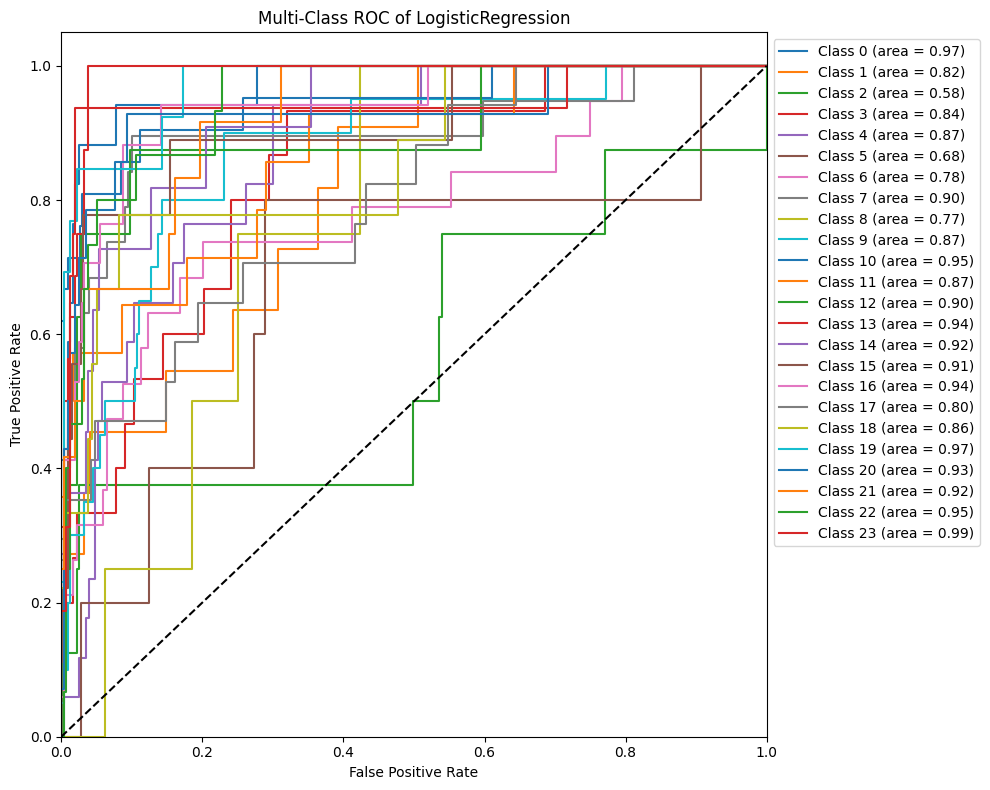

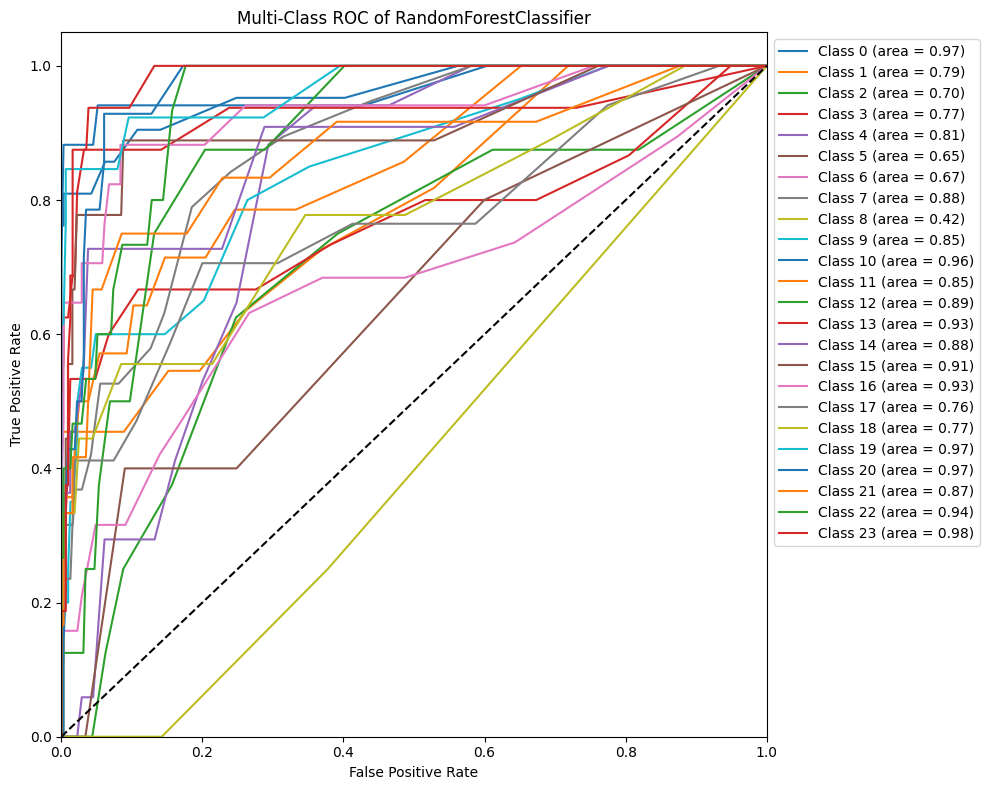

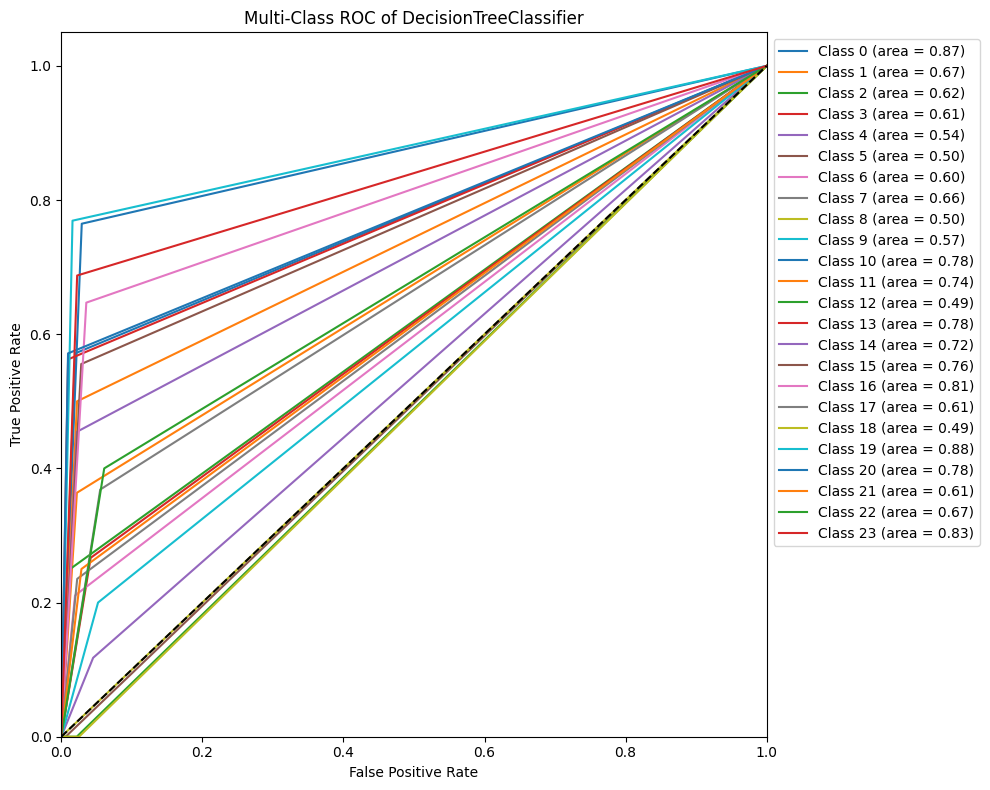

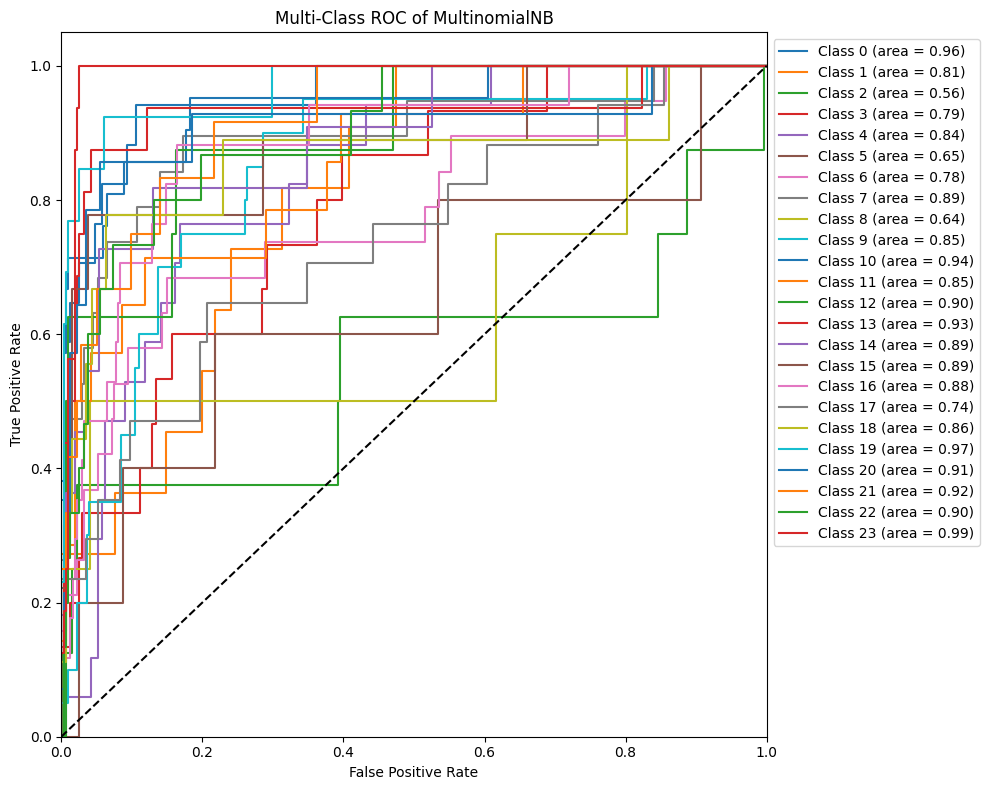

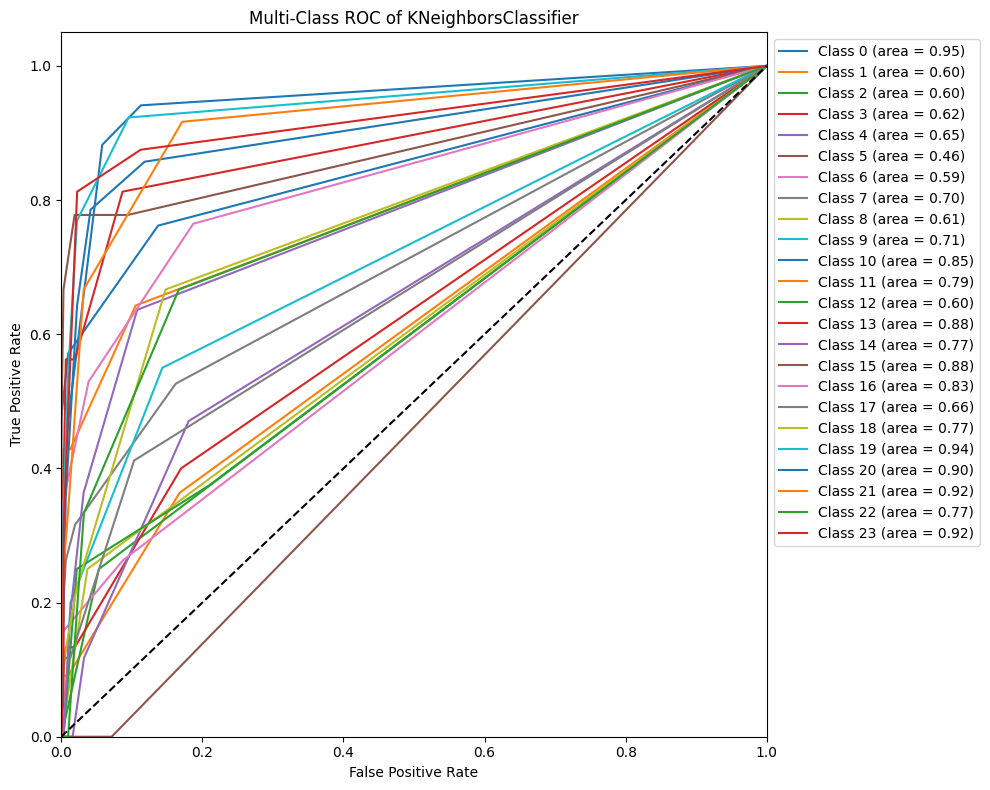

In [65]:
n_classes = len(np.unique(y_test))
models = [logreg, rf, dt, svm, mnb, knn]
for model in models:
    if hasattr(model, "predict_proba"):  # Check if model can output probabilities
        plot_multiclass_roc(model, X_test, y_test, n_classes)

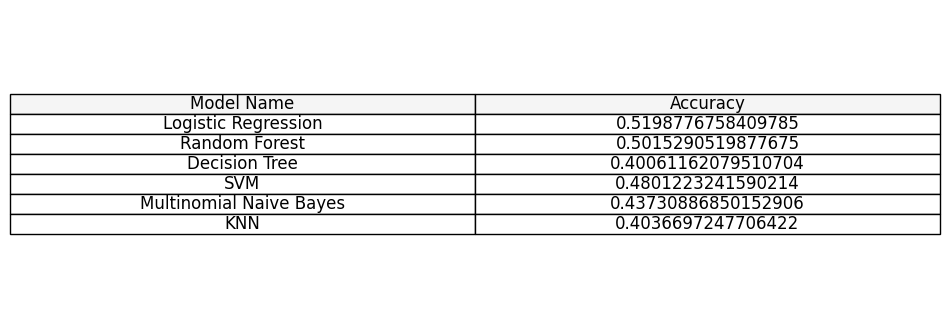

In [66]:
data = {
    'Model Name': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM', 'Multinomial Naive Bayes', 'KNN'],
    'Accuracy': [logreg_accuracy, rf_accuracy, dt_accuracy, svm_accuracy, mnb_accuracy, knn_accuracy]
}
tdf = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
tbl = ax.table(cellText=tdf.values, colLabels=tdf.columns, loc='center', cellLoc = 'center', colColours=['#f5f5f5']*tdf.shape[1])

tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.2)

plt.show()

# Hyper Parameter Identification

KNN

In [67]:
neighbors_range = list(range(1, 51))
accuracies = []

In [68]:
models = {}  # Dictionary to store trained models
for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, knn_pred)
    accuracies.append(accuracy)

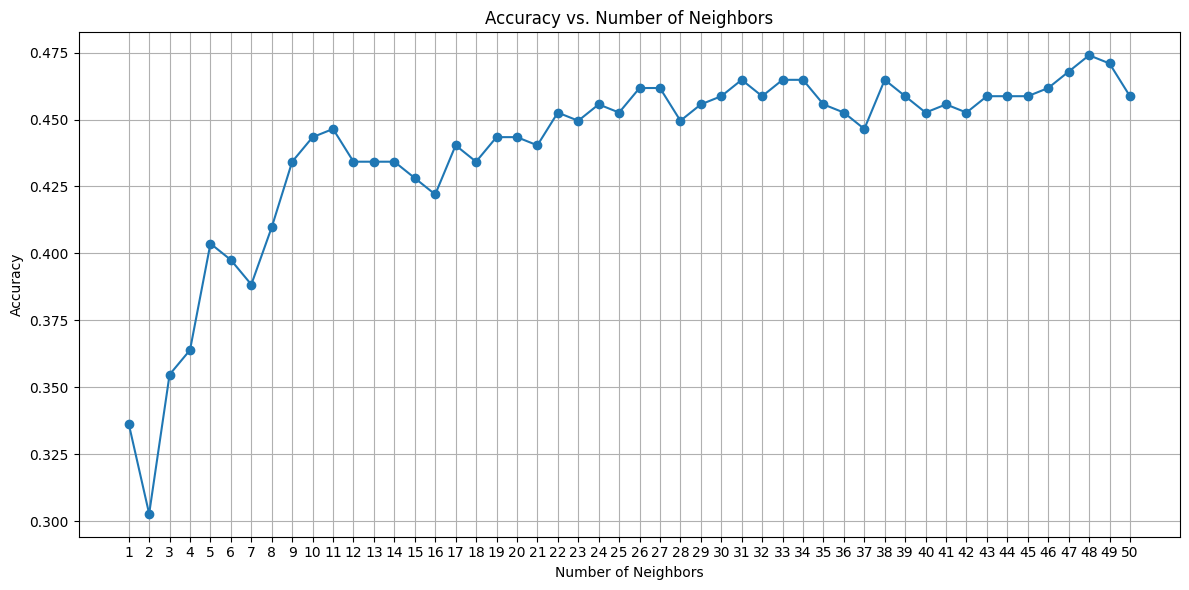

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(neighbors_range, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(neighbors_range)
plt.tight_layout()
plt.show()

In [70]:
# Define parameter grid
logreg_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Initialize GridSearch
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5, n_jobs=-1)
logreg_grid.fit(X_train, y_train)

# Extract best parameters and estimator
best_logreg_params = logreg_grid.best_params_
best_logreg = logreg_grid.best_estimator_

KeyboardInterrupt: 

In [ ]:
# Define parameter grid
rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearch
rf_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Extract best parameters and estimator
best_rf_params = rf_grid.best_params_
best_rf = rf_grid.best_estimator_

In [ ]:
# Define parameter grid
dt_params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearch
dt_grid = GridSearchCV(dt, dt_params, cv=5, n_jobs=-1)
dt_grid.fit(X_train, y_train)

# Extract best parameters and estimator
best_dt_params = dt_grid.best_params_
best_dt = dt_grid.best_estimator_

In [ ]:
# Define parameter grid
svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Initialize GridSearch
svm_grid = GridSearchCV(svm, svm_params, cv=5, n_jobs=-1)
svm_grid.fit(X_train, y_train)

# Extract best parameters and estimator
best_svm_params = svm_grid.best_params_
best_svm = svm_grid.best_estimator_

In [ ]:
# Define parameter grid
mnb_params = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 10.0]
}

# Initialize GridSearch
mnb_grid = GridSearchCV(mnb, mnb_params, cv=5, n_jobs=-1)
mnb_grid.fit(X_train, y_train)

# Extract best parameters and estimator
best_mnb_params = mnb_grid.best_params_
best_mnb = mnb_grid.best_estimator_

# Test Resume

In [71]:
import random 

In [72]:
random_row = df.sample(n=1)

In [74]:
random_row

Resume    Category  \
1859  HEALTHCARE Executive Profile Cynthia was also ...  HEALTHCARE   

                                      Experience               Education  \
1859  healthcare   may 2001   company name   ï¼​  bachelor of science      

                                                 Skills  \
1859  ada billing budgeting business process call ce...   

                                Experience_Tokens         Education_Tokens  \
1859  [healthcare, may, 2001, company, name, ï¼​]  [bachelor, of, science]   

                                          Skills_Tokens  encoded     decoded  \
1859  [ada, billing, budgeting, business, process, c...       18  HEALTHCARE   

                                          Combined_Text  
1859  healthcare   may 2001   company name   ï¼​ bac...

In [83]:
feature_value = random_row['Combined_Text']  # Reshape feature to ensure it's 2D
label_value = random_row['encoded']

In [78]:
X1 = random_row['Combined_Text']
y1 = random_row['encoded']

In [84]:
def apply_model(model_path, data, true_label):
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
    prediction = model.predict(data)
    accuracy = (prediction == true_label).mean()
    return prediction, accuracy


In [86]:
directory_path = '../ML-Classification/'
results = {}

for filename in os.listdir(directory_path):
    if filename.endswith('logreg_model.pkl'):
        model_name = filename.split('.')[0]  # Assuming the filename is the model's name
        prediction, accuracy = apply_model(os.path.join(directory_path, filename), feature_value, label_value)
        results[model_name] = {
            "prediction": prediction[0],  # Assuming the model returns a list/array
            "accuracy": accuracy
        }

print(results)

ValueError: could not convert string to float: 'healthcare   may 2001   company name   ï¼\u200b bachelor of science    ada billing budgeting business process call center consultation contracts client clients customer satisfaction customer care data collection delivery forms gcp glp gmp instructor insurance lecturer legal litigation managing marketing strategies network new product development next presentations procurement quality reporting research risk management safety sales strategy strategic strategic planning system design teaching validation professional affiliations certified disability analyst and fellow abda 371897 american board of disability analyst fellow american board of forensic examiners american board of forensic nurses'